## Import Necessary Libraries:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## Data Collection: 

In [13]:
company_data=pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data Understanding:

In [14]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [15]:
# Converting object features into numerical.
company_data=pd.get_dummies(company_data,columns=['Urban','US'],drop_first=True)
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [16]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_Yes    400 non-null    uint8  
 10  US_Yes       400 non-null    uint8  
dtypes: float64(1), int64(7), object(1), uint8(2)
memory usage: 29.0+ KB


In [17]:
#Using Label Encoder:
le= LabelEncoder()
company_data['ShelveLoc']=le.fit_transform(company_data['ShelveLoc'])

In [7]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [18]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_Yes    400 non-null    uint8  
 10  US_Yes       400 non-null    uint8  
dtypes: float64(1), int32(1), int64(7), uint8(2)
memory usage: 27.5 KB


In [19]:
# Converting output variable to Categorical
company_data['Sales']=pd.cut(company_data['Sales'],bins=[0,7.490000,16.270000],labels=[0,1])
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [20]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        399 non-null    category
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    int32   
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban_Yes    400 non-null    uint8   
 10  US_Yes       400 non-null    uint8   
dtypes: category(1), int32(1), int64(7), uint8(2)
memory usage: 24.9 KB


In [21]:
company_data['Sales'].isna().sum()          #1 null entry found

1

In [22]:
company_data["Sales"].mode()             # calculating mode of it.

0    0
Name: Sales, dtype: category
Categories (2, int64): [0 < 1]

In [23]:
company_data['Sales'].fillna(0,inplace=True)        #imputing with mode value.
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [24]:
company_data['Sales'].isna().sum()

0

In [25]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


### Now, all the features are of numerical datatypes.

In [26]:
def normal_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [27]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [30]:
company_data2=normal_func(company_data.iloc[:,1:11])
company_data2

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.5,0.145455,0.500,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,1.0,0.545455,0.125,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,1.0,0.272727,1.000,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.0,0.454545,0.250,1.0,1.0


In [32]:
company_data3=company_data.iloc[:,0]
company_data3

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: category
Categories (2, int64): [0 < 1]

In [33]:
company_data4=pd.concat([company_data2,company_data3],axis=1)
company_data4

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,Sales
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0,1
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0,1
2,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0,1
3,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0,0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.5,0.145455,0.500,1.0,1.0,1
396,0.632653,0.020202,0.103448,0.054108,0.574850,1.0,0.545455,0.125,0.0,1.0,0
397,0.867347,0.050505,0.413793,0.717435,0.808383,1.0,0.272727,1.000,1.0,1.0,0
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.0,0.454545,0.250,1.0,1.0,0


## Model Building:

In [34]:
X = company_data4.iloc[:,:10]
y = company_data4.iloc[:,10]

In [35]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.5,0.145455,0.500,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,1.0,0.545455,0.125,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,1.0,0.272727,1.000,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.0,0.454545,0.250,1.0,1.0


In [36]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: category
Categories (2, int64): [0 < 1]

In [37]:
y.unique()

[1, 0]
Categories (2, int64): [0 < 1]

In [38]:
y.value_counts()

0    201
1    199
Name: Sales, dtype: int64

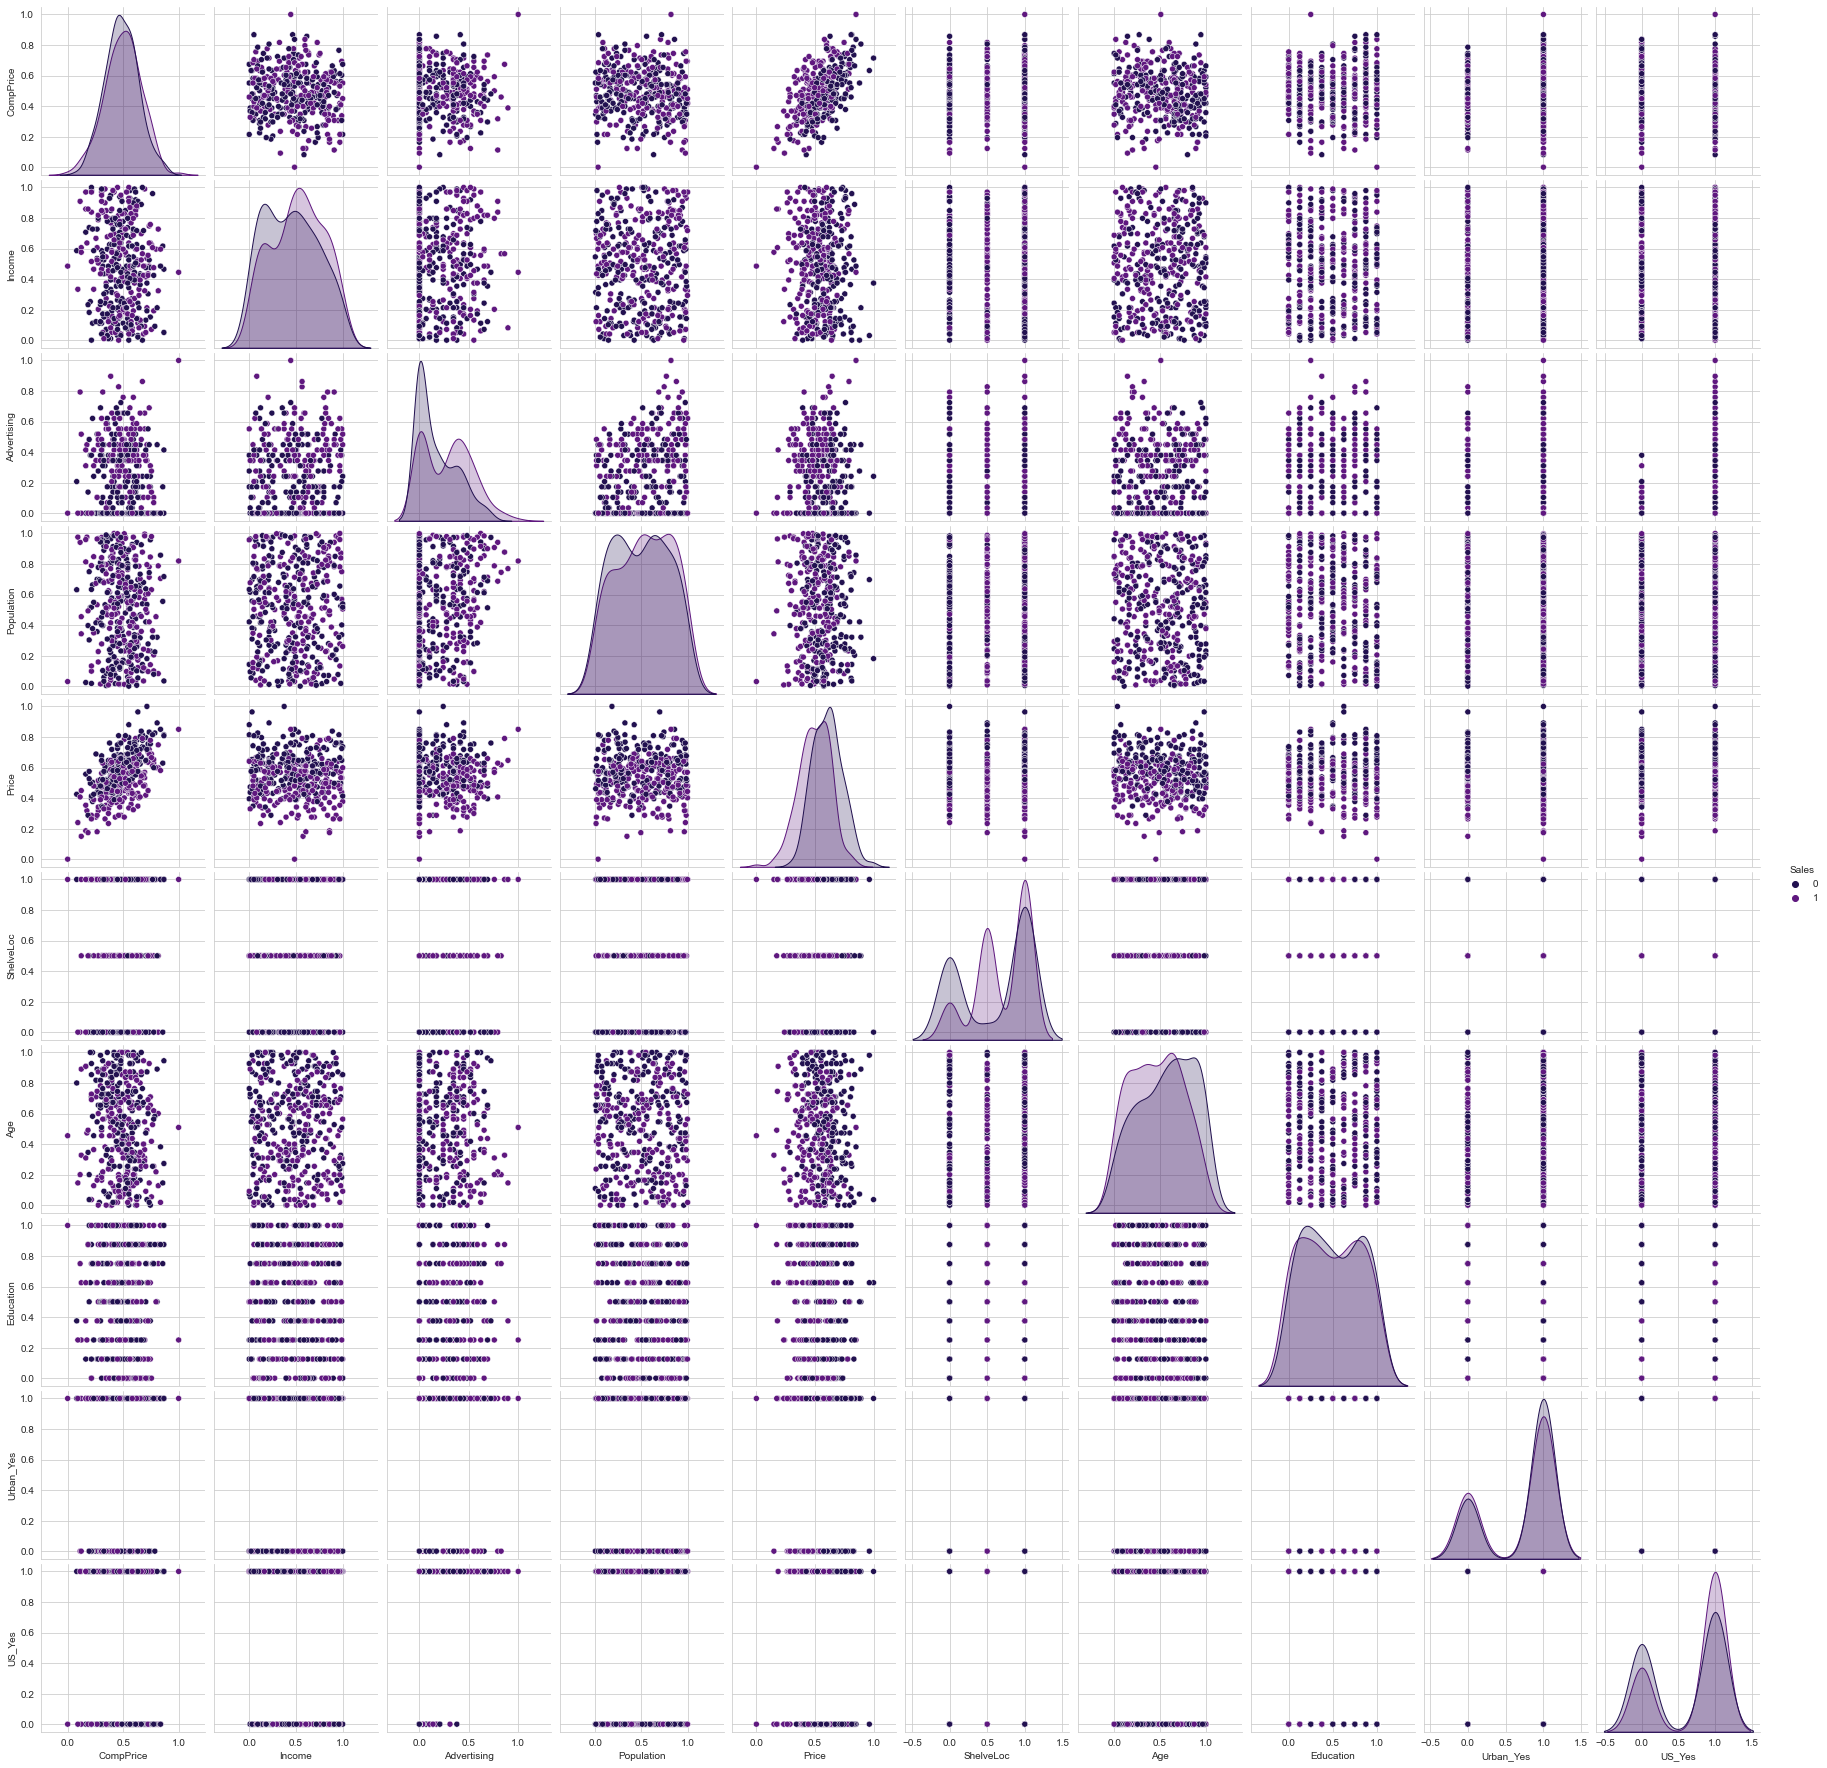

In [39]:
sns.set_palette('magma')
sns.set_style('whitegrid')
sns.pairplot(data=company_data4, hue = 'Sales')
plt.show()

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12,shuffle=True)

In [41]:
X_train.shape,y_train.shape        #training data

((320, 10), (320,))

In [42]:
X_test.shape,y_test.shape            #testing data

((80, 10), (80,))

# Model Training Using Random Forest:

### Using Entropy:

In [43]:
rf_model=RandomForestClassifier(n_estimators=15,max_depth=3,criterion='entropy')
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=15)

In [44]:
y_pred_test=rf_model.predict(X_test)
y_pred_test

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [45]:
pd.Series(y_pred_test).value_counts()

0    51
1    29
dtype: int64

In [46]:
pd.crosstab(y_test,y_pred_test)

col_0,0,1
Sales,,
0,34,6
1,17,23


In [47]:
accuracy_score(y_test,y_pred_test)

0.7125

In [48]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        40
           1       0.79      0.57      0.67        40

    accuracy                           0.71        80
   macro avg       0.73      0.71      0.71        80
weighted avg       0.73      0.71      0.71        80



#### Using, entropy the accuracy score is 71.25%

### Using Gini Index:

In [76]:
rf_model2=RandomForestClassifier(n_estimators=15,max_depth=3,criterion='gini')
rf_model2.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=15)

In [77]:
y_pred_test2=rf_model2.predict(X_test)
y_pred_test2

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [78]:
pd.Series(y_pred_test2).value_counts()

0    48
1    32
dtype: int64

In [79]:
pd.crosstab(y_test,y_pred_test2)

col_0,0,1
Sales,,
0,29,11
1,19,21


In [80]:
accuracy_score(y_test,y_pred_test2)

0.625

In [81]:
print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.60      0.72      0.66        40
           1       0.66      0.53      0.58        40

    accuracy                           0.62        80
   macro avg       0.63      0.62      0.62        80
weighted avg       0.63      0.62      0.62        80



#### Using, gini index the accuracy score is 62.5%

## For Accuracy Improvement, trying model building by using XtremeGB, Light GBM

### ExtremeGB:

In [62]:
from xgboost import XGBClassifier

In [64]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [65]:
y_test_pred_xgb=xgb_model.predict(X_test)
y_test_pred_xgb

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [66]:
pd.Series(y_test_pred_xgb).value_counts()

0    46
1    34
dtype: int64

In [67]:
pd.crosstab(y_test,y_test_pred_xgb)

col_0,0,1
Sales,,
0,36,4
1,10,30


In [68]:
np.mean(y_test_pred_xgb==y_test)*100

82.5

In [69]:
accuracy_score(y_test,y_test_pred_xgb)

0.825

#### Using ExtremeGBM, the accuracy score is 82.5%.

### LightGBM:

In [70]:
from lightgbm import LGBMClassifier

In [71]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train,y_train)

LGBMClassifier()

In [72]:
y_test_pred_lgb=lgb_model.predict(X_test)
y_test_pred_lgb

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [73]:
pd.Series(y_test_pred_lgb).value_counts()

0    42
1    38
dtype: int64

In [74]:
pd.crosstab(y_test_pred_lgb,y_test)

Sales,0,1
row_0,,
0,33,9
1,7,31


In [75]:
np.mean(y_test_pred_lgb==y_test)*100

80.0

 #### Using LightGBM, the accuracy score is 80%.